In [18]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [8]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("techsash/waste-classification-data")
print("Dataset downloaded to:", path)


Dataset downloaded to: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [14]:
import os

train_dir = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TRAIN"
val_dir = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TEST"


In [19]:

datagen = ImageDataGenerator(rescale=1.0/255)


train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128), 
    batch_size=32,
    class_mode='categorical'  
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [20]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # First convolutional layer
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])


In [21]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [23]:
# Train the model
history = model.fit(
    train_generator,
    epochs=1,
    validation_data=val_generator
)


706/706 ━━━━━━━━━━━━━━━━━━━━ 660s 934ms/step - accuracy: 0.8337 - loss: 0.3884 - val_accuracy: 0.8711 - val_loss: 0.3272


In [24]:

predictions = model.predict(val_generator)

predicted_classes = predictions.argmax(axis=1)  


79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 258ms/step


In [25]:
# Count predictions
recyclable_count = sum(predicted_classes == 0)  
non_recyclable_count = sum(predicted_classes == 1)  


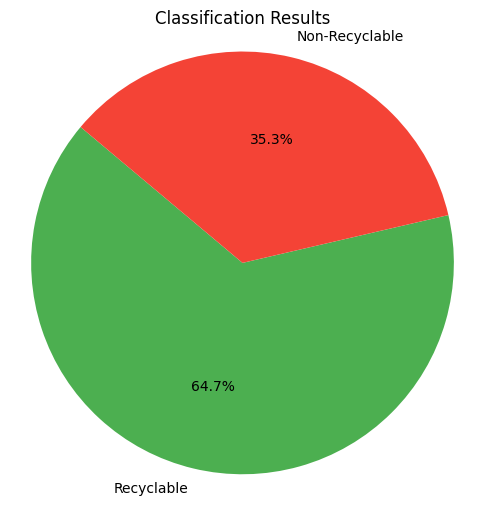

In [26]:
# Data for the pie chart
labels = ['Recyclable', 'Non-Recyclable']
sizes = [recyclable_count, non_recyclable_count]
colors = ['#4CAF50', '#F44336']  

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Classification Results')
plt.show()
